$\newcommand{\matrixdim}[2]{\underset{\,\scriptstyle#2\,}{#1}}$
$\newcommand{\vmat}[2]{{\begin{bmatrix} & & \\ & #1 &\\ & & \\\end{bmatrix}}_{\,#2\,}}$
$\newcommand{\vvec}[2]{{\begin{bmatrix} \\ #1 \\ \\\end{bmatrix}}_{\,#2\,}}$

# Principle Component Analysis

## Projection Matrix $V$

The orthonormal projection matrix $V \in \mathbb{R}^{d\times p}$ project a point $x \in \mathbb{R}^{d}$ onto a point $z \in \mathbb{R}^{p}$ in the plane spanned by the collumns of V.

\begin{align}
{{\begin{bmatrix} \\ z \\ \\\end{bmatrix}}_{\,p \times 1\,}}
=\, {{\begin{bmatrix} & & \\ & V^T &\\ & & \\\end{bmatrix}}_{\,p \times d\,}}
{{\begin{bmatrix} \\ x \\ \\\end{bmatrix}}_{\,d \times 1\,}}, &&
V = \begin{bmatrix} | & & | \\ v_1 & \ldots & v_p \\ | & & | \end{bmatrix}_{\, d \times p \,}
\end{align}

### Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

def plane2d(origin, normal):
    ''' Plane a*x + b*y + c*z + d = 0 with normal vector (a,b,c) ''' 
    d = -origin.dot(normal)
    xx, yy = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
    z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
    return xx, yy, z

def projection_mat(origin, normal):
    e1 = np.array([1., 0., 0.])
    a1 = np.cross(normal, e1)
    a1 = a1 / np.linalg.norm(a1)
    a2 = np.cross(normal, a1)
    a2 = a2 / np.linalg.norm(a2)
    return np.vstack((a1, a2)) #Projection Matrix

# Generate Data
mean = np.array([0., 0., 0.])
cov = np.array([[1., 0., 0.1],
                [0., 1., 0.11],
                [0.1, 0.1, 1]])
X = np.random.multivariate_normal(mean, cov, 20)

#Define Plane
origin  = np.array([0., 0., 0])
#normal = np.array([1., 1., 2.]) #Bad plane
normal = np.array([1., 1., -1.]) # Good plane

# Projection onto plane
A = projection_mat(origin, normal)
Z = np.dot(X, A.T)
F = np.dot(X, A.T).dot(A)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: covariance is not positive-semidefinite.


<IPython.core.display.Javascript object>


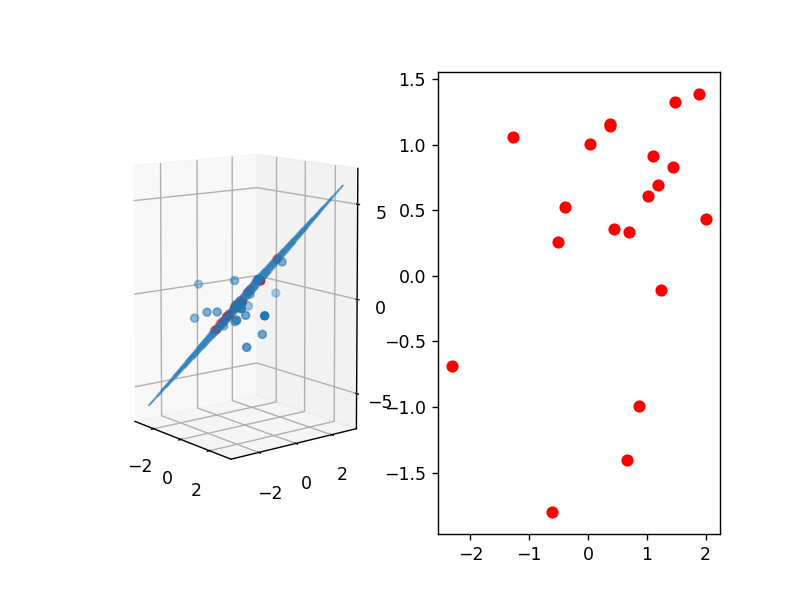

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:,0], X[:,1], X[:,2], cmap='jet_2')
ax1.scatter(F[:,0], F[:,1], F[:,2], c='r')
ax1.plot_wireframe(*plane2d(origin, normal), alpha=0.5, linewidth=1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(Z[:,0], Z[:,1], c="r")

## Centering the Data

![title](img/centering.jpg)

## The PCA Objective

Consider the reconstruction $\tilde{x}$ of $x$

 \begin{equation}
     \underset{\,\scriptstyle d \times 1\,}{\vphantom{\mu} x}
     \approx \underset{\,\scriptstyle d \times p\,}{\vphantom{\mu} V}
     \underset{\,\scriptstyle p \times 1\,}{\vphantom{\mu} z} +
     \underset{\,\scriptstyle d \times 1\,}{\mu}
 \end{equation}

We want to minimize the squared reconstruction error $L$

\begin{equation}
    L = \sum_{i=1}^n \|V z_i + \mu - x_i\|^2
\end{equation}

#### Exercise: Find the optimal latent representation $z_i$, as functions of $V$ and $\mu$

\begin{align}
     \textrm{argmin}_{z_i} \sum_i \|V z_i + \mu - x_i\|^2 &&\Rightarrow && &2V^\top(Vz_i + \mu - x_i) \overset{!}{=} 0\\
     &&\Rightarrow && & z_i = V^\top(x_i - \mu) && V^\top V = I\\\\
\end{align}

#### Exercise: Find an optimal offset $\mu$

\begin{align}
     \textrm{argmin}_{\mu_i} \sum_i \|V z_i + \mu - x_i\|^2 &&\Rightarrow && &2\sum_i (Vz_i + \mu - x_i) \overset{!}{=} 0\\
     &&\Rightarrow && & \mu = \frac{1}{n} \sum_i x_i - V z_i = \left< x \right> - V \left< z \right>
\end{align}

Now assume that $\left< z \right> = \frac{1}{n} \sum_i z_i = 0$

\begin{align}
    \left< z \right> = \frac{1}{n} \sum_i z_i &= \frac{1}{n} \sum_i V^\top(x_i - \mu)\\
    &= \frac{1}{n} \sum_i V^\top(x_i - \left< x \right>)\\
    &= V^\top(\left< x \right> - \left< x \right>)
    = 0 && \Rightarrow \text{Ansatz holds! (fulfills optimality conditions)} 
\end{align}


#### Exercise: Find an optimal projection matrix V

 \begin{align}
     \sum_i \|V z_i + \mu - x_i\|^2 &= \sum_i \|VV^\top \tilde{x}_i - \tilde{x}_i\|^2 && z_i = V^\top (x_i - \mu),\, \tilde{x}_i = (x_i  - \mu)\\
     &= \sum_i \tilde{x}_i^\top VV^\top VV^\top \tilde{x}_i - 2 \tilde{x}_i^\top VV^\top \tilde{x}_i + \tilde{x}_i^\top \tilde{x}_i && c := \sum_i \tilde{x}_i^\top \tilde{x}_i\\
     &= -\sum_i \tilde{x}_i^\top VV^\top \tilde{x}_i + c && a^\top a = \textrm{tr}(a a^\top)\\
     &= -\textrm{tr}\left( \sum_i (V^\top \tilde{x}_i)(V^\top \tilde{x}_i^\top)^\top \right) + c \\
     &= -\textrm{tr}\left(V^\top \sum_i (\tilde{x}_i \tilde{x}_i^\top) V \right) + c && \sum_i \tilde{x}_i \tilde{x}_i^\top = S \text{ (sample covariance matrix)}\\
     &= -\textrm{tr}\left(V^\top S V \right) + c && S = U D U^\top, \text{ (SVD and Symmetry of S)}\\
     &= -\textrm{tr}\left(V^\top U D U^T V \right) + c\\
     &= -\sum_{i, j}^{d, p} \sigma_i (U^\top V)^2_{i, j} + c\\
     &= -\sum_{i, j}^{d, p} \sigma_i (u_i^\top v_j)^2 + c\\
 \end{align}

## Example Yale Faces

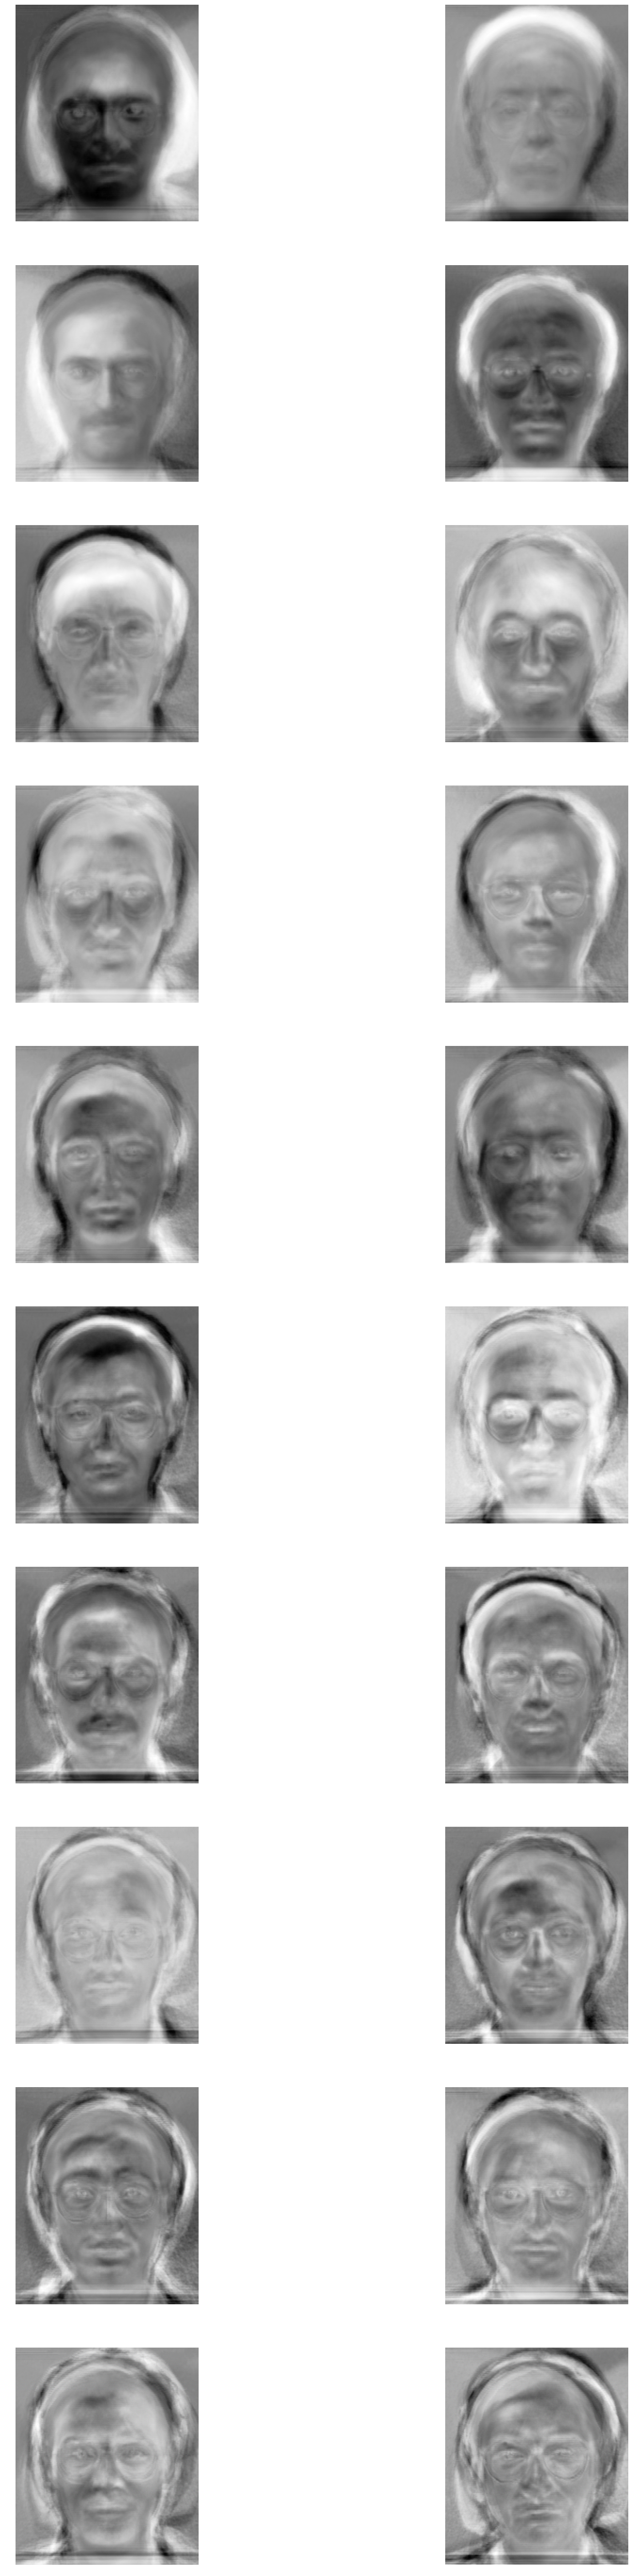

In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
%matplotlib inline

def loadData(files):
    fnames = glob.glob(files)
    X = np.array([plt.imread(fname) for fname in fnames])
    sh = X[0].shape[0:2]
    return np.array([x.flatten() for x in X]), sh

files =  'Original/subject*'
files =  'Cropped/subject*'

# Load data
X, orig_shape = loadData(files)
n, d = X.shape

# Caculate sample mean for data centering
mu = np.mean(X, axis=0)
M = np.outer(np.ones(n), mu)
Xc = X - M

# Compute SVD of centered data
U, S, V = la.svd(Xc, full_matrices=False)

#Plot images
nrows = 10
ncols = 2
plt.figure(figsize=(30, nrows*10))
for i in range(nrows):
    for j in range(ncols):
        k = i * ncols + j
        plt.subplot(nrows, ncols, i * ncols + j + 1)
        plt.imshow(V[k].reshape(orig_shape), cmap=cm.Greys_r)
        plt.axis('off')

## Reconstruction

X.shape: (165, 45045) Vp.shape: (60, 45045)


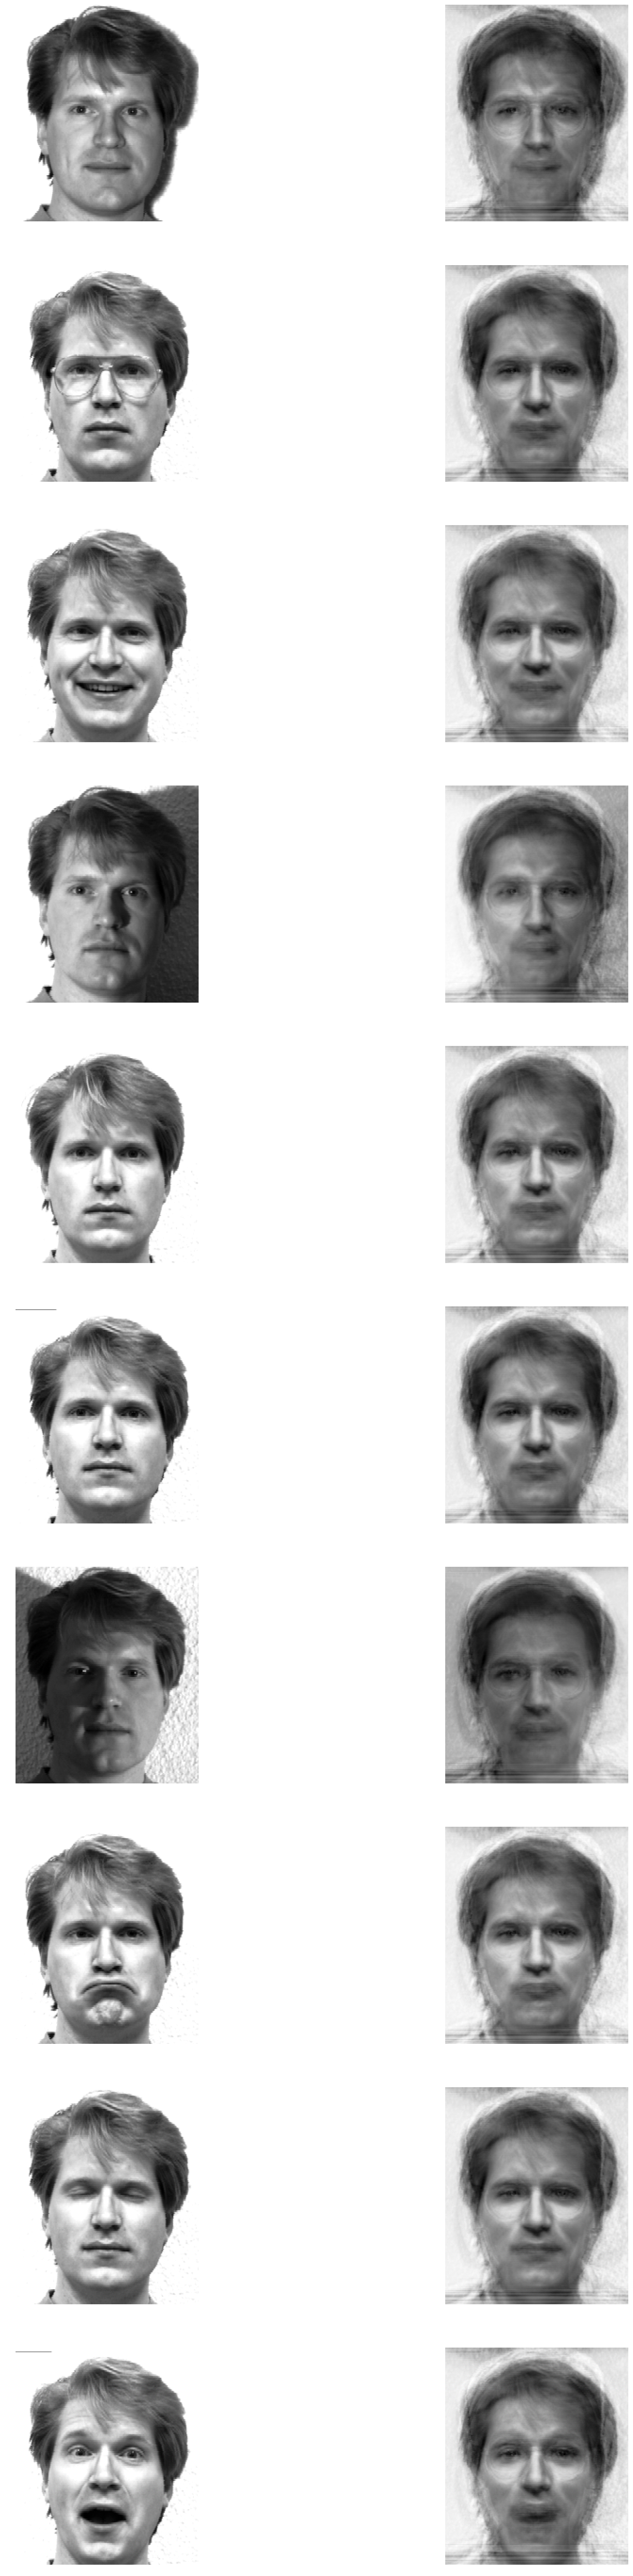

In [4]:
# Construct projection matrix from the p largest eigenvectors
p = 60
Vp = V[0:p, :]
print('X.shape:', X.shape, 'Vp.shape:', Vp.shape)

# Project and Reconstruct
Z = X.dot(Vp.T)
Xt = M + Z.dot(Vp)

#Plot images
nrows = 10
ncols = 2
plt.figure(figsize=(30, nrows*10))
for i in range(nrows):
    x, xt = X[i, :], Xt[i, :]
    plt.subplot(nrows, ncols, i * ncols + 1)
    plt.imshow(x.reshape(orig_shape), cmap=cm.Greys_r)
    plt.axis('off')
    plt.subplot(nrows, ncols, i * ncols + 2)
    plt.imshow(xt.reshape(orig_shape), cmap=cm.Greys_r)
    plt.axis('off')

## Mean Face

(-0.5, 194.5, 230.5, -0.5)

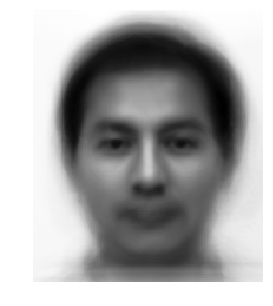

In [5]:
plt.figure(figsize=(15,5))
plt.imshow(mu.reshape(orig_shape), cmap=cm.Greys_r)
plt.axis('off')